# Set Theory Analysis

This notebook will be taking a look at how the True and False predictions match up between various models for the Sigmorphon REU projec

This implementation used only the baseline and lemma implementations

# Joining datasets and data view
t.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read in raw
# rawlemma = pd.read_csv('7-29-20.lemma.predictcsv')ions.
rawlemma = pd.read_csv('scraped_data/8-13-20.lemma.tst.predictions.csv')
rawbase = pd.read_csv('scraped_data/2020-07-10-tsv.predictions.csv')

# subset languages and models used
rawbase = rawbase[(rawbase['language'] == 'gml') | (rawbase['language'] == 'nno')]
rawbase = rawbase[(rawbase['model'] == 'transformer') | (rawbase['model'] == 'mono-hmm')]


# seperate two models
lemmasub = rawlemma[['language', 'model', 'truth', 'is_correct']]
basesub = rawbase[['language', 'model', 'truth', 'is_correct']]

joined = lemmasub.append(basesub)

joined.columns = ['language', 'model', 'truth', 'guess']

joined.head()
# rawlemma.head()

,language,model,truth,guess
0,nno+25p+eng,transformer,snøleopardane,1
1,nno+25p+eng,transformer,namibiarane,1
2,nno+25p+eng,transformer,utdanningane,1
3,nno+25p+eng,transformer,arkitektoniske,1
4,nno+25p+eng,transformer,tryllestavane,1


# Display of bar charts for each word and their total number of guesses

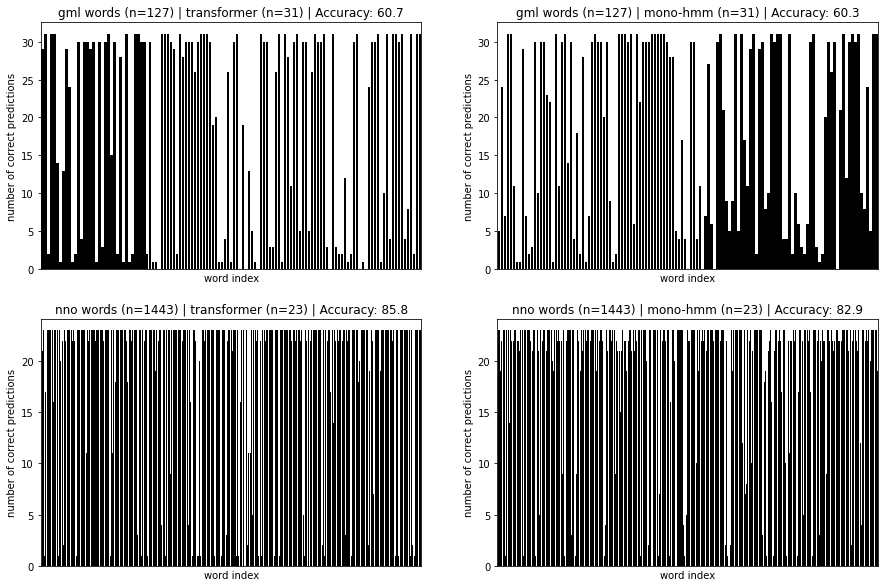

In [54]:
from functools import reduce

gml_model_guess = []
nno_model_guess = []
models = []

nno_nmodels = 0
gml_nmodels = 0

for model in ['transformer', 'mono-hmm']:
    # transformer then mono-hmm

    # subset out model
    model_sub = joined[joined['model'] == model]

    # subset languages into list
    gml_dfs = []
    nno_dfs = []

    # fill lists
    for language in joined['language'].unique():
        # subset out language
        lang_sub = model_sub[model_sub['language'] == language].reset_index()
        lang_sub['index'] = lang_sub.index
        lang_sub = lang_sub[['index', 'guess']]

        # add to correct list
        if 'nno' in language.split('+')[0]:
            nno_dfs.append(lang_sub)
            if model == 'transformer':
                nno_nmodels = nno_nmodels + 1
        elif 'gml' in language.split('+')[0]:
            gml_dfs.append(lang_sub)
            if model == 'transformer':
                gml_nmodels = gml_nmodels + 1


    # merge lists to be {index, g1, g2, ...}
    gml_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='index'), gml_dfs)
    nno_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='index'), nno_dfs)

    # sum number of correct guesses for each model
    gml_nguess = [sum([guess for guess in row[2:]]) for row in gml_df.itertuples()]
    nno_nguess = [sum([guess for guess in row[2:]]) for row in nno_df.itertuples()]

    # add to total list
    gml_model_guess.append(gml_nguess)
    nno_model_guess.append(nno_nguess)

    models.append(model)

# model_guess contains two lists with the number of corret guesses for each word made by each model, seperated by model type
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=False, sharey=False)
print()
for n in range(len(models)):

    model = models[n]

    p1 = sns.barplot(x=[i for i in range(len(gml_model_guess[n]))], y=gml_model_guess[n], color='black', ax=ax[0,n])
    p2 = sns.barplot(x=[i for i in range(len(nno_model_guess[n]))], y=nno_model_guess[n], color='black', ax=ax[1,n])

    ax[0,n].set_xlabel('word index')
    ax[1,n].set_xlabel('word index')

    ax[0,n].set_ylabel('number of correct predictions')
    ax[1,n].set_ylabel('number of correct predictions')

    ax[0,n].axes.xaxis.set_ticks([])
    ax[1,n].axes.xaxis.set_ticks([])

    ax[0,n].set_title(f'gml words (n={len(gml_model_guess[n])}) | {model} (n={gml_nmodels}) | Accuracy: {round(sum(gml_model_guess[n])/len(gml_model_guess[n]*gml_nmodels)*100,1)}')
    ax[1,n].set_title(f'nno words (n={len(nno_model_guess[n])}) | {model} (n={nno_nmodels}) | Accuracy: {round(sum(nno_model_guess[n])/len(nno_model_guess[n]*nno_nmodels)*100,1)}')

plt.savefig('target.ncorrect.nword.png')
plt.show()


# Summarization of results into text for math checking

In [48]:
# middle low german
# all false : if number of correct guesses is 0, then all false
gml_t_all_false = [1 if nguess == 0 else 0 for nguess in gml_model_guess[0]]
gml_m_all_false = [1 if nguess == 0 else 0 for nguess in gml_model_guess[1]]
gml_all_false = [1 if gml_t_all_false[i] == 1 and gml_m_all_false[i] == 1 else 0 for i in range(len(gml_t_all_false))]
# all correct : if number of correct guesses is the number of models then all true
gml_t_all_true = [1 if nguess == gml_nmodels else 0 for nguess in gml_model_guess[0]]
gml_m_all_true = [1 if nguess == gml_nmodels else 0 for nguess in gml_model_guess[1]]
gml_all_true = [1 if gml_t_all_true[i] == 1 and gml_m_all_true[i] == 1 else 0 for i in range(len(gml_t_all_true))]

# norwegian nynorsk
# all false : if number of correct guesses is 0, then all false
nno_t_all_false = [1 if nguess == 0 else 0 for nguess in nno_model_guess[0]]
nno_m_all_false = [1 if nguess == 0 else 0 for nguess in nno_model_guess[1]]
nno_all_false = [1 if nno_t_all_false[i] == 1 and nno_m_all_false[i] == 1 else 0 for i in range(len(nno_t_all_false))]
# all correct : if number of correct guesses is the number of models then all true
nno_t_all_true = [1 if nguess == nno_nmodels else 0 for nguess in nno_model_guess[0]]
nno_m_all_true = [1 if nguess == nno_nmodels else 0 for nguess in nno_model_guess[1]]
nno_all_true = [1 if nno_t_all_true[i] == 1 and nno_m_all_true[i] == 1 else 0 for i in range(len(nno_t_all_true))]

nwords_gml = len(gml_all_false)

# transformer
gml_ptrans_F = round(sum(gml_t_all_false)/nwords_gml* 100, 1)
gml_ptrans_T = round(sum(gml_t_all_true)/nwords_gml* 100, 1)
gml_ptrans_TF = round(100 - gml_ptrans_F - gml_ptrans_T, 1)
# mono-hmm
gml_pmono_F = round(sum(gml_m_all_false)/nwords_gml* 100, 1)
gml_pmono_T = round(sum(gml_m_all_true)/nwords_gml* 100, 1)
gml_pmono_TF = round(100 - gml_pmono_F - gml_pmono_T, 1)
# total
gml_pall_F = round(sum(gml_all_false)/nwords_gml* 100, 1)
gml_pall_T = round(sum(gml_all_true)/nwords_gml* 100, 1)
gml_pall_TF = round(100 - gml_pall_F - gml_pall_T, 1)

nwords_nno = len(nno_all_false)

# transformer
nno_ptrans_F = round(sum(nno_t_all_false)/nwords_nno* 100, 1)
nno_ptrans_T = round(sum(nno_t_all_true)/nwords_nno* 100, 1)
nno_ptrans_TF = round(100 - nno_ptrans_F - nno_ptrans_T, 1)
# mono-hmm
nno_pmono_F = round(sum(nno_m_all_false)/nwords_nno* 100, 1)
nno_pmono_T = round(sum(nno_m_all_true)/nwords_nno* 100, 1)
nno_pmono_TF = round(100 - nno_pmono_F - nno_pmono_T, 1)
# total
nno_pall_F = round(sum(nno_all_false)/nwords_nno* 100, 1)
nno_pall_T = round(sum(nno_all_true)/nwords_nno* 100, 1)
nno_pall_TF = round(100 - nno_pall_F - nno_pall_T, 1)

print(f'transformer: gml | T: {gml_ptrans_T}, F: {gml_ptrans_F}, T/F: {gml_ptrans_TF}')
print(f'mono-hmm: gml | T: {gml_pmono_T}, F: {gml_pmono_F}, T/F: {gml_pmono_TF}')
print(f'combined: gml | T: {gml_pall_T}, F: {gml_pall_F}, T/F: {gml_pall_TF}')

gml_sets = [[gml_ptrans_T, gml_ptrans_F, gml_ptrans_TF], [gml_pmono_T, gml_pmono_F, gml_pmono_TF], [gml_pall_T, gml_pall_F, gml_pall_TF]]

print(f'transformer: nno | T: {nno_ptrans_T}, F: {nno_ptrans_F}, T/F: {nno_ptrans_TF}')
print(f'mono-hmm: nno | T: {nno_pmono_T}, F: {nno_pmono_F}, T/F: {nno_pmono_TF}')
print(f'combined: nno | T: {nno_pall_T}, F: {nno_pall_F}, T/F: {nno_pall_TF}')

nno_sets = [[nno_ptrans_T, nno_ptrans_F, nno_ptrans_TF], [nno_pmono_T, nno_pmono_F, nno_pmono_TF], [nno_pall_T, nno_pall_F, nno_pall_TF]]

transformer: gml | T: 24.4, F: 5.5, T/F: 70.1
mono-hmm: gml | T: 22.8, F: 3.1, T/F: 74.1
combined: gml | T: 18.1, F: 1.6, T/F: 80.3
transformer: nno | T: 68.2, F: 1.0, T/F: 30.8
mono-hmm: nno | T: 54.5, F: 1.7, T/F: 43.8
combined: nno | T: 51.1, F: 0.3, T/F: 48.6


# Display of Venn Diagrams for the above results

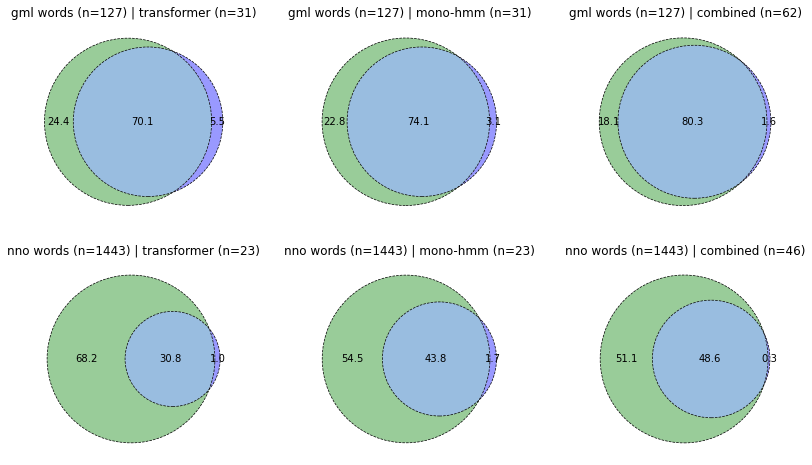

In [70]:
from matplotlib_venn import venn2, venn2_circles

all_sets = [gml_sets, nno_sets]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

for n, lang_set in enumerate(all_sets):
    if n == 0:
        lang = 'Middle Low German'
    else:
        lang = 'Norwegian Nynorsk'

    for i,venn_set in enumerate(lang_set):

        if i == 0:
            model = 'transformer'
            k=1
        elif i == 1:
            model = 'mono-hmm'
            k=1
        else:
            model = 'combined'
            k=2 # for nmodels

        v = venn2(subsets = venn_set, set_labels = ('', ''), ax = ax[n, i], set_colors = ['green', 'blue'])
        c = venn2_circles(venn_set, ax=ax[n, i], linestyle='dashed', linewidth=0.7)

        ax[0, i].set_title(f'gml words (n={nwords_gml}) | {model} (n={gml_nmodels*k})')
        ax[1, i].set_title(f'nno words (n={nwords_nno}) | {model} (n={nno_nmodels*k})')

# to save
plt.savefig('set.theory.lemmas.png')

plt.show()